
<font color=blue>

## Вступление
   
Целью данной работы является исследование данных о продаже компьютерных игр. Требуется проанализировать данные о продажах с учетом платформ и жанров компьюетерных игр,  влияние на них оценок поьзователей и критиков, и на этой основе дать рекомендации для планирования рекламной кампании. 
    
Для проведения исследования мы используем полученнyю таблицу с данными:

Таблица games.csv со следующими столбцами:
    
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы долларов)
 - EU_sales — продажи в Европе (миллионы долларов)
 - JP_sales — продажи в Японии (миллионы долларов)
 - Other_sales — продажи в других странах (миллионы долларов)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Ассоциация определяет рейтинг 
   компьютерных игр и присваивает им подходящую возрастную категорию.
  
    
Для решения поставленных задач планирую применить методы, которые были освоены в процесссе прохождения курсов "Предобработка данных", "Исследовательский анализ данных" и "Статистический анализ данных".
    
     

</font> 

# Шаг 1. Откройте файл с данными и изучите общую информацию


<font color=blue>

 
   
Ознакомимся с содержанием Таблицы с данными.

</font> 

In [114]:
import pandas as pd
import numpy as np
from IPython.display import display
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')

In [115]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [116]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [117]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [118]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [119]:
games.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [120]:
games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [121]:
games.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [122]:
games.Name.describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

In [123]:
games.shape

(16715, 11)


<font color=blue>

 
   
 Ознакомились предварительно с данными. По меньшей мере у нас 16715 строк и 12 столбцов. Смотрим дальше.

</font> 

# Шаг 2. Подготовьте данные

## Задача


### Замените названия столбцов (приведите к нижнему регистру);
### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [124]:
# ПРИВЕДЕМ НАЗВАНИЕ СТОЛЮБЦОВ К НИЖНЕМУ РЕГИСТРУ

games.columns =  games.columns.str.lower()

In [125]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [126]:
games['user_score'].unique()  

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [127]:
games['critic_score'].unique()  

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [128]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [129]:
games.user_score.value_counts() # ИССЛЕДУЕМ ДАННЫЕ. СМОТРИМ УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В СТОЛБЦЕ user_score

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
0.3       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [130]:
#games['year_of_release'].tail(50)

games.year_of_release.value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [131]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [132]:
# ПЕРЕВЕДЕМ ТИП ЗНАЧЕНИЯ СТОЛБЦА YEAR_OF_RELEASE В ЦЕЛОЧИСЛЕННЫЙ

games['year_of_release'] = games['year_of_release'].astype('Int64')

In [133]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [134]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000,  NaN, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [135]:
games.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [136]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [137]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [138]:
#ЗАМЕНИМ TBD (TO BE DEFINED) НА NAN


games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [139]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [140]:
# ПЕРЕВЕДЕМ ТИП ДАННЫХ В СТОЛБЦЕ USER_SCORE ИЗ СТРОКОЫХ В ВЕЩЕСТВЕННЫЙ

games['user_score'] = games['user_score'].astype('Float64')

In [141]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [142]:
games.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [143]:
# НА ВСЯКИЙ СЛУЧАЙ ПРОВЕРИЛИ НА НАЛИЧИЕ ДУБЛИКАТОВ.


games.duplicated().sum() 

0


<font color=blue>

Привели столбцы к нижнему регистру так как удобнее писать названия столюцов со строчной буквы. Так точно не ошибешься какая из букв заглавная, а какая нет... Они теперь все строчные.

Проанализировали типы данных столбцов и приняли решение осуществить замены следующим образом:
 - Заменили тип данных в столбце year_of_release на целочисленный, чтобы было удобнее с ним работать.
 - Заменили в столбце user_score значение tbd на nan, так как считаю что смысл этого обозначения состоит в отсутствии информации по данному вопросу и значение nan вполне для этого подходит.

</font> 

### Обработайте пропуски при необходимости:

### - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
### - Опишите причины, которые могли привести к пропускам;
### - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать (данный пункт полагаю рассмотрен выше) 
 
 

In [144]:
# ОПРЕДЕЛИМ ГДЕ ПРОПУСКИ

games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [145]:
#ЗАМЕНЯЕМ ПРОПУСКИ В СТОЛБЦЕ "ЖАНР" НА "unnamed_genre".

games['genre'] = games['genre'].fillna(value= 'unnamed_genre') 

In [146]:
#ЗАМЕНЯЕМ ПРОПУСКИ В СТОЛБЦЕ "НАЗВАНИЕ" НА "unnamed".

games['name'] = games['name'].fillna(value= 'unnamed') 

In [147]:
games.groupby('platform').agg({'year_of_release': ['mean']}).mean()
 

year_of_release  mean    2001.677598
dtype: float64

In [148]:
#ЗАМЕНЯЕМ ПРОПУСКИ В СТОЛБЦЕ "ГОД ВЫПУСКА" НА "2002".

games['year_of_release'] = games['year_of_release'].fillna(value= 2002) 

In [149]:
# ОПРЕДЕЛИМ ГДЕ ПРОПУСКИ

games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

<font color=blue>

### Выводы
Проверили данные на отсутствие пропусков. Обнаружили пропуски в столбцах year_of_release, critic_score, user_score и rating.
Что касается пропусков в year_of_release считаю их колимчество совсем не велико чтобы каким то образом повляить на данное исследование, поэтому их оставляем нетронутыми.
Что касается пропусков в столбцах user_score и critic_score можно было бы попытаться заменить их медианами хначения этих оценок критиками и пользователями игр сгруппированных по платформе, жанру и году выпуска, однако не вижу особой причины, чтобы это делать.
Кроме того, отсутствие оценок это своего рода тоже оценка, иными словами нежелание пользователей и критиков "проголосовать" за тот или иной продукт. Таким обрахом оставляем эти пропуски.
Что касается пропусков в столблце rating  с возрастым рейтингом  ESRB, то здесь однозначно считаю делать какие то замены делать категорически неверно так как  только ESRB уполномочен устанавляиать данные рейтинги. Их отстутствие по всей вероятности связано с какими то техническими причинами. 
</font>     

<font color=cian>

**ПОЛАГАЮ, ЧТО ПРОПУСКИ С СТОЛБЦАХ USER_SCORE И CRITIC_SCORE СКОРЕЕ ИМЕЮТ НЕ ТЕХНИЧЕСКУЮ ПРИРОДУ, И ИЗ МОЖНО РАССМАТРИВАТЬ КАК НЕКУЮ СВОЕГО РОДА ТАКЖЕ ОЦЕНКУ, И ПОЭТОМУ ИХ МОЖНО ВЫДЕЛИТЬ В ОТДЕЛЬНУЮ КАТЕГОРИЮ "БЕЗ ОТЗЫВА ПОЛЬЗОВАТЕЛЕЙ" И "ОТЗЫВА КРИТИКОВ". ОТСУТСТВИЕ ВОЗРАСТНОГО РЕЙТИНГА ВОЗМОЖНО СВЯЗАНО С НЕДОСТОЮЩЕЙ ИНФОРМАЦИЕЙ. ПРОПУСКИ В ГОДАХ ВЫПУСКА МОЖНО БЫЛО БЫ ПРЕДПОЛОЖИТЬ ЧТО ЭТО БЫЛ ТАК ДАВНО, ЧТО ГОД ВЫПУСКА СИЛЬНО ПОДЗАБЫЛСЯ )**


</font>  




### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [150]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [151]:
# ПОСЧИТАЕМ СУММАРНЫЕ ПРОДАЖМ ВО ВСЕХ РЕГИОНАХ И ЗАПИШЕМ В ОТДЕЛЬНЫЙ СТОЛБЦ TOTAL_SALES  

games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)


In [152]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38



<font color=blue>
 
Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

</font> 
 

# Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [153]:
games_vs_years = games.pivot_table(index = 'year_of_release',  values='name', aggfunc = 'count')

games_vs_years.T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,36,17,14,14,21,16,15,17,...,1197,1427,1426,1255,1136,653,544,581,606,502


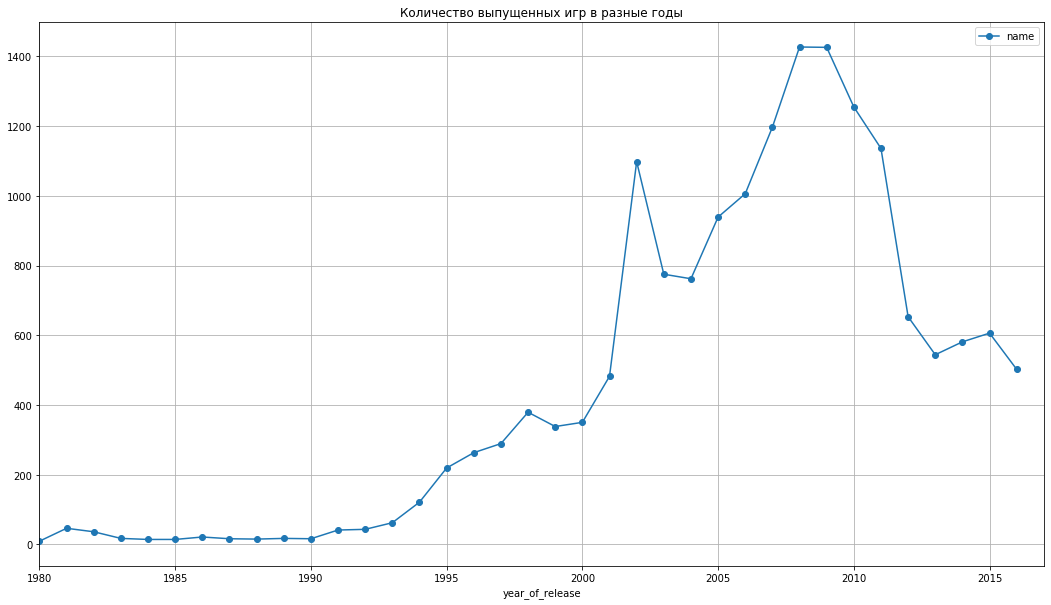

In [154]:

games_vs_years.plot(style='o-', xlim=(1980, 2017), grid=True, figsize=(18, 10), title='Количество выпущенных игр в разные годы')
                                  


<font color=blue>

### Вывод
   
Посмотрели сколько игр выпускались в разные годы. 
    
Отметим резкий рост выпущенных игр в пириод с 2000 года по 2009 год, и через небольшой промежуток времени такой же резкий спад, очевидно связанный с мировым кризисом 2009-2010 года, последствия которого сказались на всех отраслях экономики.
    
Думаю, что цифры с 1980 по 2000 это скорее достояние истории, и к поставленной задаче исследования имеют отношение конечно только данные за последние лет 5 до планируемого прогноза на 2017 год. 
  
     

</font> 

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [155]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [156]:
platform = games.groupby('platform')

In [157]:
total_sales_vs_platforms =  games.groupby('platform')['total_sales'].agg(np.sum)

total_sales_vs_platforms.sort_values()


platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       30.77
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

In [158]:
total_sales_vs_other_platforms = total_sales_vs_platforms[total_sales_vs_platforms < 730.0]

In [159]:
total_sales_vs_other_platforms.sum()

3304.379999999989

In [160]:
total_sales_vs_popular_platforms = total_sales_vs_platforms[total_sales_vs_platforms > 730.0]

In [161]:
total_sales_vs_popular_platforms

platform
DS       806.12
PS       730.86
PS2     1255.77
PS3      939.65
Wii      907.51
X360     971.42
Name: total_sales, dtype: float64

In [162]:
others = pd.Series(['3304.38'],['ДРУГИЕ'])


In [163]:


others = others.astype('float64')


In [164]:
total_sales_vs_popular_platforms_with_others = total_sales_vs_popular_platforms.append(others)

 

In [165]:
total_sales_vs_popular_platforms_with_others

DS         806.12
PS         730.86
PS2       1255.77
PS3        939.65
Wii        907.51
X360       971.42
ДРУГИЕ    3304.38
dtype: float64

In [166]:
total_sales_vs_popular_platforms_with_others 

DS         806.12
PS         730.86
PS2       1255.77
PS3        939.65
Wii        907.51
X360       971.42
ДРУГИЕ    3304.38
dtype: float64

In [167]:
total_sales_vs_popular_platforms[0]

806.119999999985

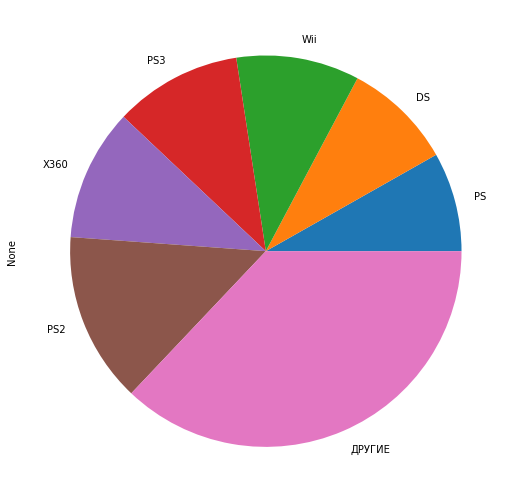

In [169]:
total_sales_vs_popular_platforms_with_others.sort_values().plot(kind='pie', x='platorm', y='total_sales', figsize=(9, 9))
plt.show()


In [170]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [171]:
platforms = games.pivot_table(index = ['platform', 'year_of_release'], values='total_sales', aggfunc = 'sum').reset_index()

platforms.columns = ['platform',  'year_of_release',  'total_sales_sum']

platforms.head(50).sort_values(ascending=False, by='total_sales_sum')
 

,platform,year_of_release,total_sales_sum
32,DS,2007,146.94
33,DS,2008,145.31
30,DS,2005,130.14
31,DS,2006,119.81
34,DS,2009,119.54
35,DS,2010,85.02
40,GB,1989,64.97
14,3DS,2011,63.20
16,3DS,2013,56.57
15,3DS,2012,51.36


In [172]:
platforms_vs_year_of_release = games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platforms_vs_year_of_release.tail()



platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2012,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2013,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.58,NaN,18.96
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


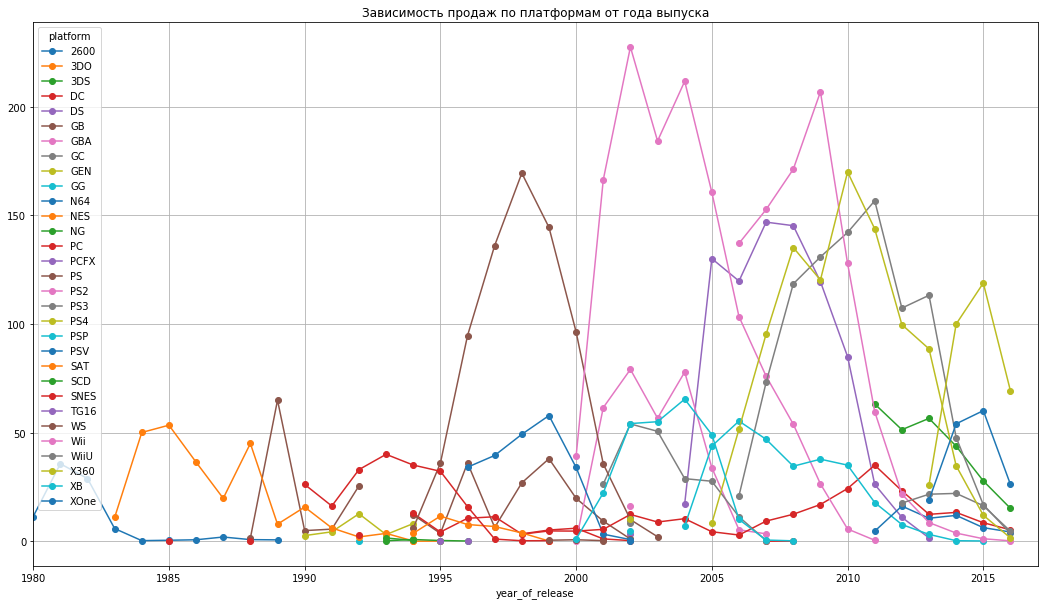

In [173]:
platforms_vs_year_of_release.plot(style='o-', xlim=(1980, 2017), grid=True, figsize=(18, 10), title='Зависимость продаж по платформам от года выпуска')
                                  
                             
 





<font color=blue>

### Вывод
    
Посмотроенный графии изменение объемов продаж по платформам и по годам дает интересную пищу для размышления, мы видим как появлялись и исчезали новым платформы. Примерно это выглядело так: резкий рост продаж на протяжении 2-3-4 лет и следующий за ним такой же резкий 3-4-летний спад. Некоторым платформам не удавалось достигать высот продаж лиlеров рынка и спустя пару лет они исчезали. Стабbльно на протяжении всего периода исследовании мы видим как с переменным успехом продаются игры на платформе "PC" видимо не подверженной настроениям пользователей и 'кономическиv факторfv.
  
В безусловных лидерах по объемам продаж на этом рынке за период наблюдений с 1980 по 2016 платформы: PS, DS, Wii, PS3, X360 и наконец PS2      
 
     

</font> 



In [174]:
platforms_vs_year_of_release.query('year_of_release > 2010').T

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
2600,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN
DS,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN


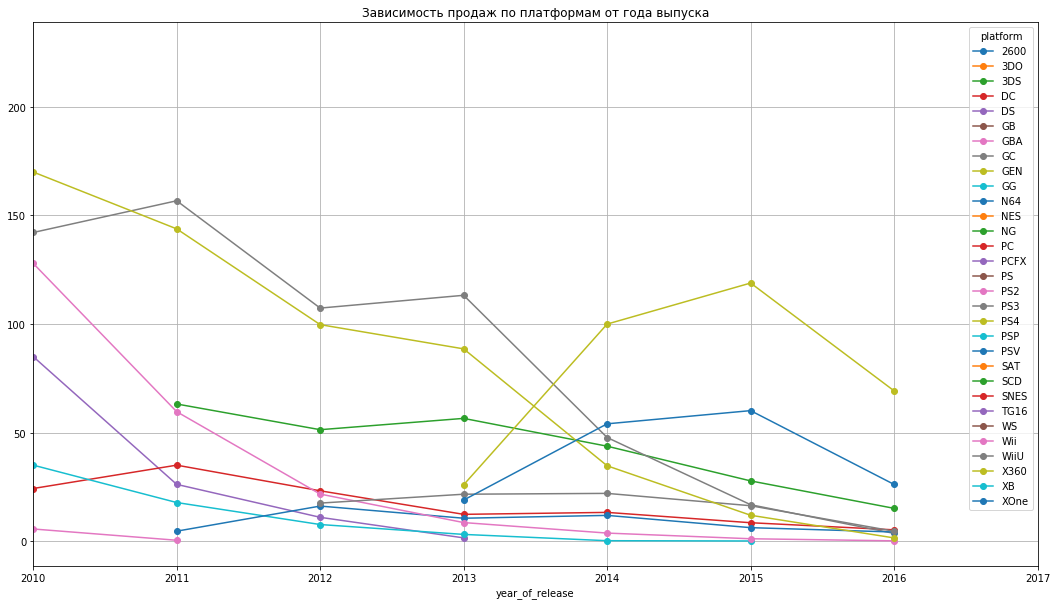

In [175]:
platforms_vs_year_of_release.plot(style='o-', xlim=(2010, 2017), grid=True, figsize=(18, 10), title='Зависимость продаж по платформам от года выпуска')
                                  
                             
 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
### Не учитывайте в работе данные за предыдущие годы.


<font color=blue>

### Вывод
    
За актуальный период выбран был период с <font color=cian>**2011**</font>  по 2016 год. Как ранее отмечено начиная с 2009 года мы отмечаем стабильное снижение объемов продаж, полагаю вызванное экономическим кризисом и последущим общим спадом в мировой экономике.
    
     

</font> 

 

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


<font color=blue>

### Вывод
В период с 2015 по 2016 наблюдаем спад продаж по всем платформам, которые до 2015 имели рост продаж. Меньший спад наблюдаем у платформ, которые не отличались большими объемами продаж. Выбрать потенциально прибыльные платформы я предположу все таки из тех 3 наиболее прибыльных платформ, по которым однако мы видим тоже снижение продаж: PS4, XOne и 3DS.
     

</font> 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [176]:
platforms_after_2010 = platforms.query('year_of_release > 2010')

platforms_after_2010.head()

,platform,year_of_release,total_sales_sum
14,3DS,2011,63.20
15,3DS,2012,51.36
16,3DS,2013,56.57
17,3DS,2014,43.76
18,3DS,2015,27.78


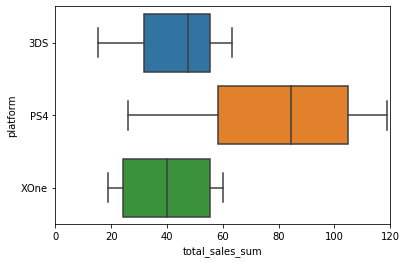

In [177]:
top_3_platforms = ['XOne', 'PS4', '3DS']

sns.boxplot(y="platform", x="total_sales_sum", data=platforms_after_2010[platforms_after_2010['platform'].isin(top_3_platforms)], orient="h")
plt.xlim(0, 120)
figsize=(18, 10)


<font color=blue>

### Вывод
Построили график «ящик с усами» по глобальным продажам игр в разбивке по лидирующим платформам.
Наблюдаем, что медианы соответственно располагаютс от самого высокого значение у PS4, затем 3DS и далее Xone.
Также отметим, что межквартильный размах а значит и вариативность выше у платформы PS4. У платфрмы 3DS медиана выше чем у Xone, но межквартильный размах выше у Xone.

</font> 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

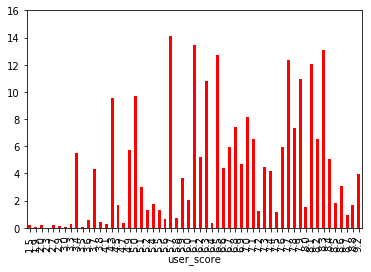

In [178]:
# ПОСМОТРИМ КАК ВЛИЯЮТ НА ПРОДАЖИ ВНУТРИ ПОПУЛЯРНОЙ ПЛАТФОРМА ОТЗЫВЫ ПОЛЬЗОВАТЕЛЕЙ И КРИТИКОВ НА ПРИМЕРЕ САМОЙ ПОПУЛЯРНОЙ НА 2016 ГОД ПЛАТФОРМЫ PS4

games_after_2010 = games.query('year_of_release > 2010')

ps4_platform = games_after_2010.query('platform == "PS4"')

ps4_platform_total_sales_vs_user_score = ps4_platform.groupby('user_score')['total_sales'].agg('sum')
 
ps4_platform_total_sales_vs_user_score.plot(kind='bar', ylim=(0, 16), xlim=(0, 50), x='user_score', y='total_sales', color='red') 
 

In [179]:
ps4_platform['user_score'].min()

1.5

In [180]:
ps4_platform['user_score'].max()

9.2

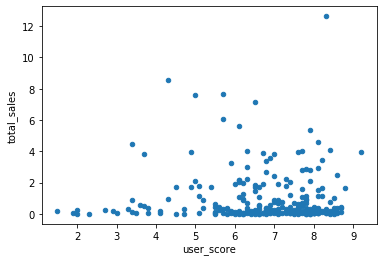

In [181]:
ps4_platform.plot(x='user_score', y='total_sales', kind='scatter')

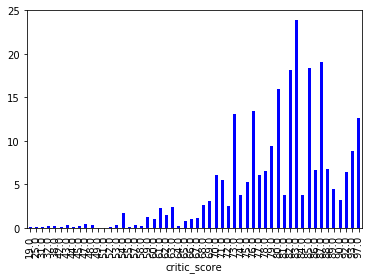

In [182]:
ps4_platform_total_sales_vs_critic_score = ps4_platform.groupby('critic_score')['total_sales'].agg('sum')
 
 

ps4_platform_total_sales_vs_critic_score.plot(kind='bar', ylim=(0, 25), xlim=(0, 10), x='critic_score', y='total_sales', color='blue') 
 

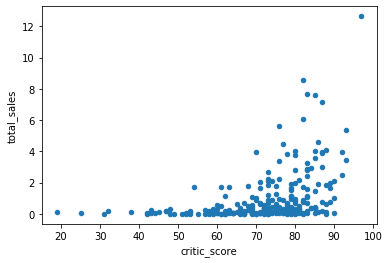

In [183]:

ps4_platform.plot(x='critic_score', y='total_sales', kind='scatter')

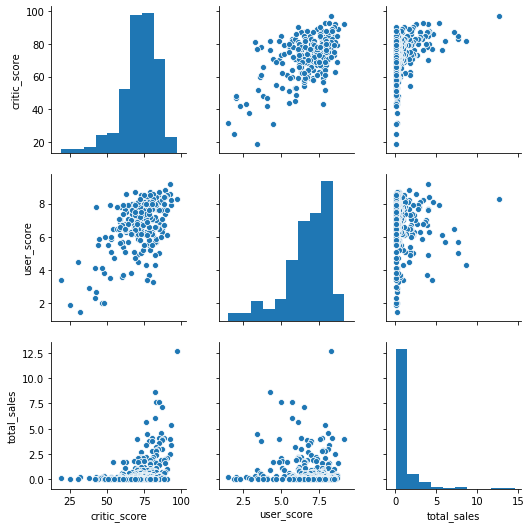

In [184]:
cols = ['critic_score', 'user_score', 'total_sales']
sns_plot = sns.pairplot(ps4_platform[cols])
sns_plot.savefig('pairplot.png')

In [185]:
display(ps4_platform[['total_sales', 'critic_score']].corr())

,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


In [186]:
display(ps4_platform[['total_sales', 'user_score']].corr())

,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


In [187]:
display(games[['total_sales', 'critic_score']].corr())

,total_sales,critic_score
total_sales,1.000000,0.245507
critic_score,0.245507,1.000000


In [188]:
display(games[['total_sales', 'user_score']].corr())

,total_sales,user_score
total_sales,1.000000,0.088179
user_score,0.088179,1.000000


### Соотнесите выводы с продажами игр на других платформах.


<font color=blue>

### Вывод
Построенные графики позволяют сделать вывод что отзывы критиков очень сильно влияют на продажи игр популярной платформы. Что касается продаж игр на других платформах они коррелириуют с отзывами критиков но в меньшей степени, а вот от отзывов пользователей продажи зависят мало. 
     

</font> 

'Зависимость Выручки от Отзывов Пользователей'

'XOne'

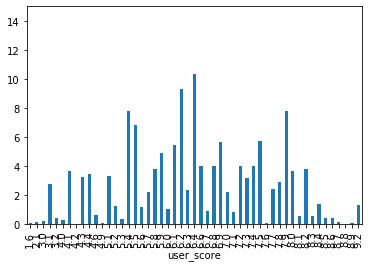

'Зависимость Выручки от Отзывов Критиков'

'XOne'

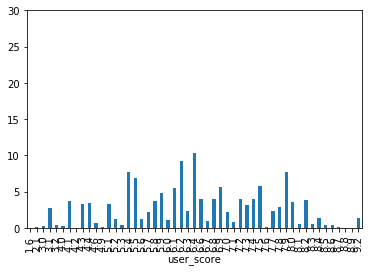

'Зависимость Выручки от Отзывов Пользователей'

'PS4'

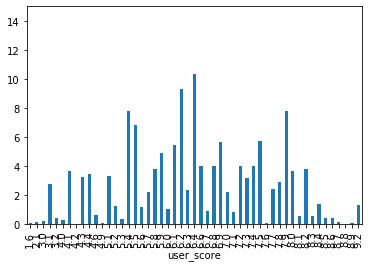

'Зависимость Выручки от Отзывов Критиков'

'PS4'

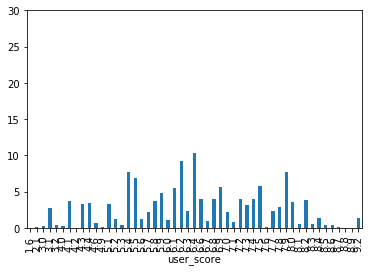

'Зависимость Выручки от Отзывов Пользователей'

'3DS'

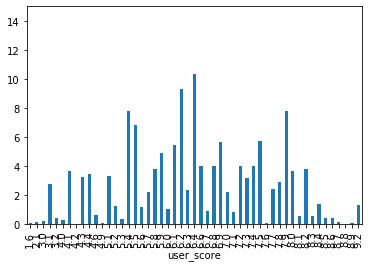

'Зависимость Выручки от Отзывов Критиков'

'3DS'

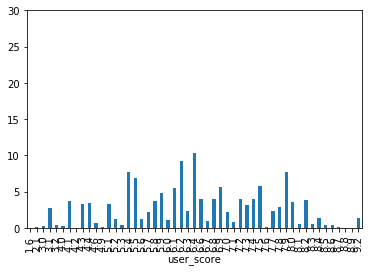

'Зависимость Выручки от Отзывов Пользователей'

'XOne'

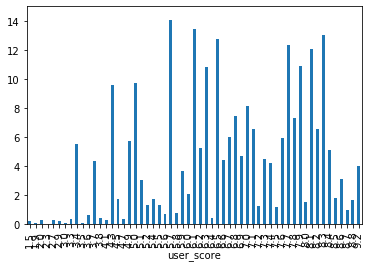

'Зависимость Выручки от Отзывов Критиков'

'XOne'

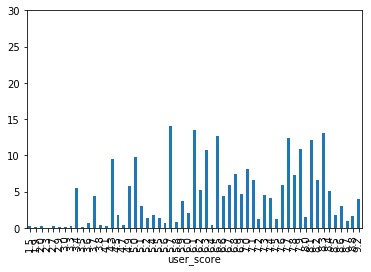

'Зависимость Выручки от Отзывов Пользователей'

'PS4'

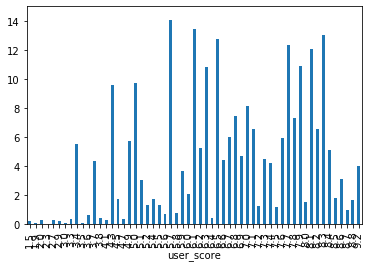

'Зависимость Выручки от Отзывов Критиков'

'PS4'

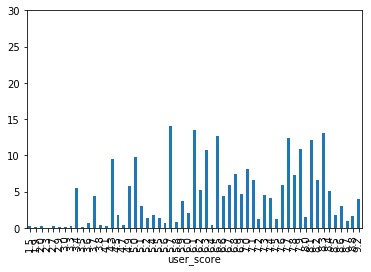

'Зависимость Выручки от Отзывов Пользователей'

'3DS'

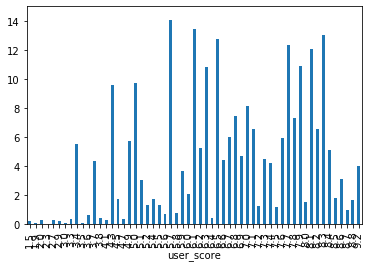

'Зависимость Выручки от Отзывов Критиков'

'3DS'

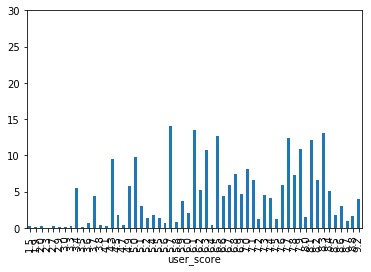

'Зависимость Выручки от Отзывов Пользователей'

'XOne'

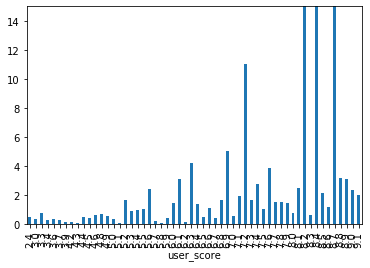

'Зависимость Выручки от Отзывов Критиков'

'XOne'

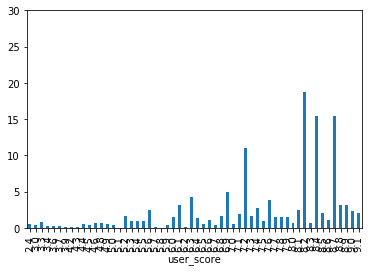

'Зависимость Выручки от Отзывов Пользователей'

'PS4'

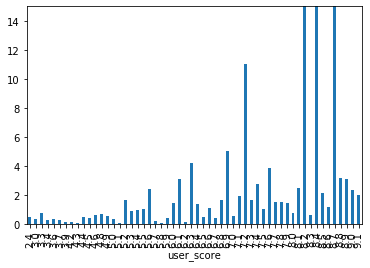

'Зависимость Выручки от Отзывов Критиков'

'PS4'

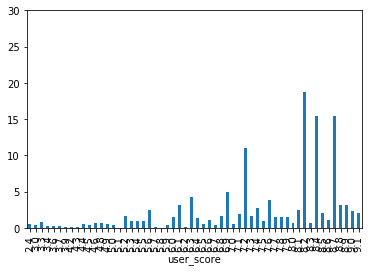

'Зависимость Выручки от Отзывов Пользователей'

'3DS'

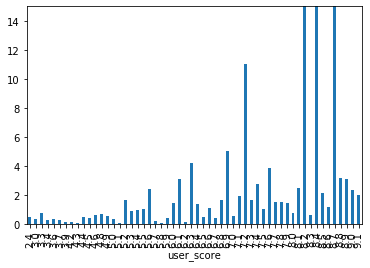

'Зависимость Выручки от Отзывов Критиков'

'3DS'

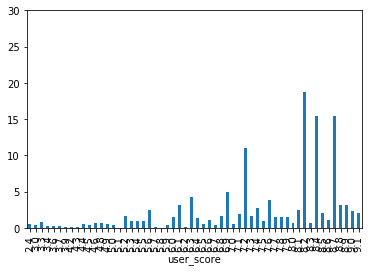

In [189]:

lst2 = ['XOne', 'PS4', '3DS']
lst1 = ['XOne', 'PS4', '3DS']
for i in lst1: 
    for j in range(len(lst2)):
        display('Зависимость Выручки от Отзывов Пользователей')
        display(lst2[j])
        games_after_2010[games_after_2010['platform'] == i]\
        .groupby('user_score')['total_sales']\
        .agg('sum').plot(kind='bar', ylim=(0, 15), xlim=(0, 10),  x='user_score', y='total_sales')
        plt.show()
        display('Зависимость Выручки от Отзывов Критиков')
        display(lst2[j])
        games_after_2010[games_after_2010['platform'] == i]\
        .groupby('user_score')['total_sales']\
        .agg('sum').plot(kind='bar', ylim=(0, 30), xlim=(0, 10), x='critic_score', y='total_sales')
        plt.show()

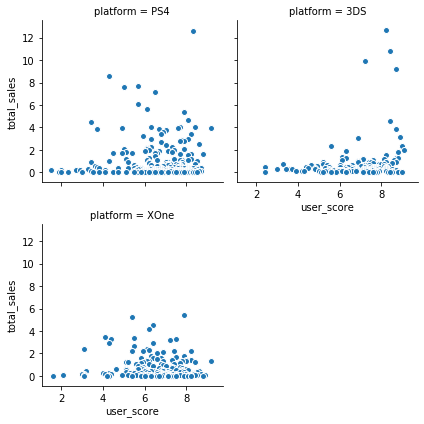

In [190]:
g = sns.FacetGrid(
    games_after_2010[games_after_2010["platform"].isin(["XOne", "PS4", "3DS"])],
    col="platform",
    col_wrap=2
)
g = g.map(plt.scatter, "user_score", "total_sales", edgecolor="w")
plt.show()

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [191]:
games_genre = games.groupby('genre')['total_sales'].agg('sum')

games_genre.sort_values()
 

genre
unnamed_genre       2.42
Strategy          174.23
Adventure         237.59
Puzzle            242.57
Simulation        389.97
Fighting          447.53
Racing            728.67
Misc              802.51
Platform          827.77
Role-Playing      934.56
Shooter          1052.45
Sports           1331.27
Action           1744.17
Name: total_sales, dtype: float64

<font color=blue>

### Вывод
Можно сделать вывод, что в лидирующую тройку жанров входят Экшны, Шутеры и Спортивные игры. К тройке отстающих относятся Стратегии. Приключения и  Пазлы.

     
</font> 

# Шаг 4. Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):
### - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
### - Самые популярные жанры (топ-5). Поясните разницу.
### -  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [192]:
games_after_2010

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


,platform,jp_sales_sum
0,3DS,100.62
4,PS3,49.39
6,PSP,24.04
7,PSV,21.84
5,PS4,15.96


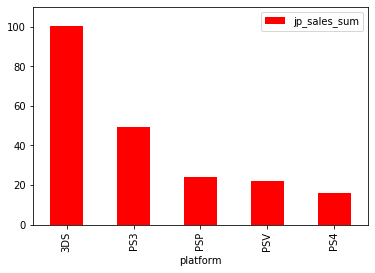

In [193]:
platform_jp_sales = games_after_2010.pivot_table(index = 'platform', values='jp_sales', aggfunc = 'sum').reset_index()

platform_jp_sales.columns = ['platform',  'jp_sales_sum'] 

top_5_platform_jp_sales = platform_jp_sales.query('jp_sales_sum > 15.0')

display(top_5_platform_jp_sales.sort_values(ascending=False, by='jp_sales_sum').head())

top_5_platform_jp_sales.sort_values(ascending=False, by='jp_sales_sum').plot(kind='bar', ylim=(0, 110), x='platform', y='jp_sales_sum', color='red')
 

,platform,na_sales_sum
4,PS3,168.26
0,3DS,82.65
2,PC,29.88
1,DS,18.86
3,PS2,0.13


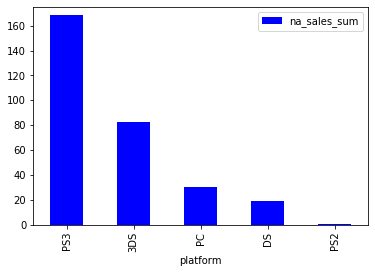

In [194]:
games_na_sales = games_after_2010.pivot_table(index = 'platform', values='na_sales', aggfunc = 'sum').reset_index()

games_na_sales.columns = ['platform',  'na_sales_sum'] 

top_5_platform_na_sales = games_na_sales.query('na_sales_sum > 0.1')

display(top_5_platform_na_sales.head().sort_values(ascending=False, by='na_sales_sum'))

top_5_platform_na_sales.head().sort_values(ascending=False, by='na_sales_sum').plot(kind='bar', ylim=(0, 175), x='platform', y='na_sales_sum', color='blue')

,platform,eu_sales_sum
4,PS3,163.10
5,PS4,141.09
10,X360,117.10
0,3DS,61.27
2,PC,56.70


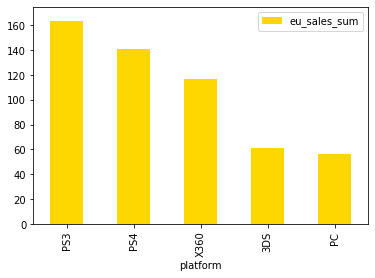

In [195]:
games_eu_sales = games_after_2010.pivot_table(index = 'platform', values='eu_sales', aggfunc = 'sum').reset_index()

games_eu_sales.columns = ['platform',  'eu_sales_sum'] 

top_5_platform_eu_sales = games_eu_sales.query('eu_sales_sum > 56.0') 

display(top_5_platform_eu_sales.sort_values(ascending=False, by='eu_sales_sum').head())

top_5_platform_eu_sales.sort_values(ascending=False, by='eu_sales_sum').plot(kind='bar', ylim=(0, 175), x='platform', y='eu_sales_sum', color='gold')

,genre,jp_sales_sum
7,Role-Playing,79.87
0,Action,63.62
3,Misc,17.60
2,Fighting,12.38
4,Platform,12.13


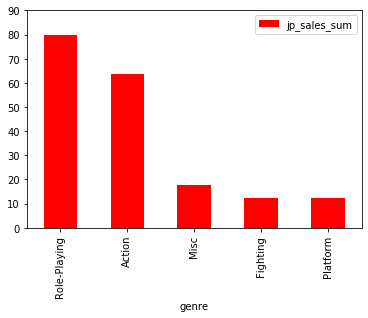

In [196]:
genre_jp_sales = games_after_2010.pivot_table(index = 'genre', values='jp_sales', aggfunc = 'sum').reset_index()

genre_jp_sales.columns = ['genre',  'jp_sales_sum'] 

top_5_genre_jp_sales = genre_jp_sales.query('jp_sales_sum > 12.12') 

display(top_5_genre_jp_sales.sort_values(ascending=False, by='jp_sales_sum').head())

top_5_genre_jp_sales.head().sort_values(ascending=False, by='jp_sales_sum').plot(kind='bar', ylim=(0, 90), x='genre', y='jp_sales_sum', color='red')
 


,genre,na_sales_sum
0,Action,230.92
8,Shooter,194.43
10,Sports,108.70
7,Role-Playing,83.78
3,Misc,69.69


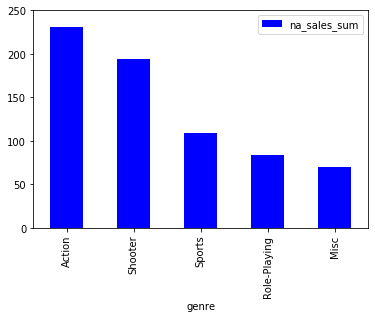

In [197]:
genre_na_sales = games_after_2010.pivot_table(index = 'genre', values='na_sales', aggfunc = 'sum').reset_index()

genre_na_sales.columns = ['genre',  'na_sales_sum'] 

top_5_genre_na_sales = genre_na_sales.query('na_sales_sum > 69.68') 

display(top_5_genre_na_sales.sort_values(ascending=False, by='na_sales_sum').head())

top_5_genre_na_sales.sort_values(ascending=False, by='na_sales_sum').plot(kind='bar', ylim=(0, 250), x='genre', y='na_sales_sum', color='blue')
 

,genre,eu_sales_sum
0,Action,199.12
8,Shooter,148.02
10,Sports,88.48
7,Role-Playing,62.30
6,Racing,40.58


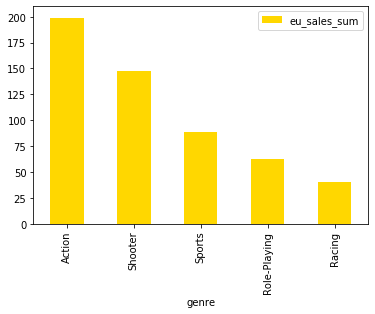

In [198]:
genre_eu_sales = games_after_2010.pivot_table(index = 'genre', values='eu_sales', aggfunc = 'sum').reset_index()

genre_eu_sales.columns = ['genre',  'eu_sales_sum'] 
 
top_5_genre_eu_sales = genre_eu_sales.query('eu_sales_sum > 40.5') 

display(top_5_genre_eu_sales.sort_values(ascending=False, by='eu_sales_sum').head()) 

top_5_genre_eu_sales.sort_values(ascending=False, by='eu_sales_sum').plot(kind='bar', ylim=(0, 210), x='genre', y='eu_sales_sum', color='gold')
 

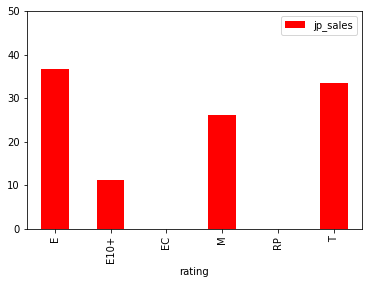

In [199]:
jp_sales_vs_rating = games_after_2010.pivot_table(index = 'rating', values='jp_sales', aggfunc = 'sum').reset_index()

jp_sales_vs_rating.plot(kind='bar', ylim=(0, 50), x='rating', y='jp_sales', color='red') 

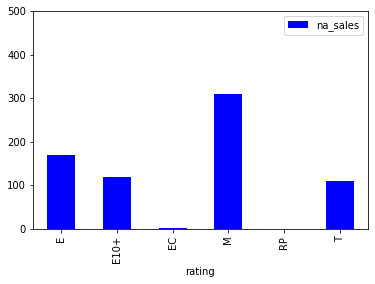

In [200]:
na_sales_vs_rating = games_after_2010.pivot_table(index = 'rating', values='na_sales', aggfunc = 'sum').reset_index()

na_sales_vs_rating.plot(kind='bar', ylim=(0, 500), x='rating', y='na_sales', color='blue') 

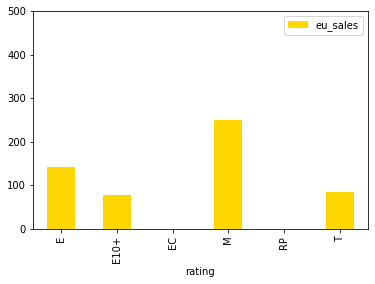

In [201]:
eu_sales_vs_rating = games_after_2010.pivot_table(index = 'rating', values='eu_sales', aggfunc = 'sum').reset_index()

eu_sales_vs_rating.plot(kind='bar', ylim=(0, 500), x='rating', y='eu_sales', color='gold') 

In [202]:
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<font color=blue>

### Вывод
    
Составили "портрет" пользователя каждого региона из трех регионов - Сев.Америки, Европы и Японии.
1. Самыми популярными платформами в Японии оказались (в порядке убывания): 3DS, PS3, PSP, PSV и PS4.    
2. Самыми популярными платформами в Сев.Америка оказались (в порядке убывания): X360, PS3, PS4, XOne и 3DS.
3. Самыми популярными платформами в Европе оказались (в порядке убывания): PS3, PS4, X360, 3DS и PC. 

Видим, что в 5 лидеров во всех основных регионов входят разный набор платформ. Видим, что для всех регионов характерно присутствие разных версий PS. В отличии от Европы и Сев.Америке в Японии не популярна X360. А в Европе в отличии от Сев.Америки и Японии до сих пор популярна PC.
       
1. Самыми популярными жанрами в Японии оказались (в порядке убывания): Role-Playing, Action, Misc, Fighting и Platform.
2. Самыми популярными жанрами в Сев.Америка оказались (в порядке убывания): Action, Shooter, Sports, Role-Playing и Misc. 
3. Самыми популярными жанрами в Европе оказались (в порядке убывания): Action, Shooter, Sports, Role-Playing и Racing.
    
Видим, что 5 топ популярных жанров также отличаются в разных регионах, но при этом в Европе и Сев.Америке наблюдаем, что в тройке лидеров жанры Экшн, Шутеры и Спорт. В Японии на 1 месте Ролевые игры.
 
Мы видим, что Влияет ли рейтинг ESRB оказывает заметно разное влияние по регионам. Самые большие продажи в Европе и Сев. Америке приходтся на категорию рейтинга "M" то есть для "Взрослых". Тогда как в Японии наибольшие продажи приходятся на "E" то есть для "Всех". Интересно, что соотношение продаж к категории рейтинга для Европы и Сев.Америки практически идентичны.
  
     
</font>

# Шаг 5. Проверьте гипотезы

In [203]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
### - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Задайте самостоятельно пороговое значение alpha.

### Поясните:
### - Как вы сформулировали нулевую и альтернативную гипотезы;
### - Какой критерий применили для проверки гипотез и почему.





<font color=blue>

Проверим 2 гипотезы:

i) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

ii)  Средние пользовательские рейтинги жанров Action и Sports разные;

     

</font> 

<font color=blue> 

Для Гипотезы i) Нулевую гипотезу формулируем следующим образом:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
и соответственно для Альтернативной гипотезы формулировка будет следующая: Средние пользовательские рейтинги платформ Xbox One и PC различаются;

Попытаемся отвергнуть Нулевую гипотезу.
 
</font> 

In [204]:
xone = games_after_2010.query('platform == "XOne"')

xone_user_score = xone.groupby('name')['user_score'].mean()

xone_user_score.tail(50)

name
Sniper Elite 3                                        6.6
Song of the Deep                                      6.9
Star Wars Battlefront (2015)                          NaN
State of Decay                                        NaN
Sunset Overdrive                                      7.7
Sébastien Loeb Rally Evo                              8.2
Teenage Mutant Ninja Turtles: Mutants in Manhattan    6.0
Terraria                                              7.7
The Amazing Spider-Man 2 (2014)                       NaN
The Crew                                              5.9
The Crew: Wild Run                                    6.6
The Elder Scrolls Online                              8.4
The Elder Scrolls V: Skyrim                           NaN
The Evil Within                                       7.3
The Golf Club                                         5.4
The LEGO Movie Videogame                              6.9
The Technomancer                                      7.4
The Walki

In [205]:
xone_user_score_values = xone_user_score.values

In [206]:
pc = games.query('platform == "PC"')

pc_user_score = pc.groupby('name')['user_score'].mean()

pc_user_score.tail(50)

name
Warhammer 40,000: Dawn of War II - Chaos Rising    NaN
Warhammer 40,000: Dawn of War II - Retribution     7.8
Warhammer 40,000: Dawn of War: Soulstorm           NaN
Warhammer 40,000: Space Marine                     7.4
Warhammer Online: Age of Reckoning                 7.9
Warhammer: Mark of Chaos                           7.4
Wasteland 2                                        7.3
Watch Dogs                                         4.7
Who wants to be a millionaire                      NaN
Wildlife Park 3                                    NaN
Wildstar                                           7.4
Winning Eleven: Pro Evolution Soccer 2007          NaN
Wolfenstein                                        7.3
Wolfenstein: The New Order                         8.2
Wolfenstein: The Old Blood                         7.6
World in Conflict                                  8.1
World in Conflict: Complete Edition                NaN
World of Goo                                       8.5
World

In [207]:
pc_user_score_values = pc_user_score.values

 

<font color=blue> 

Для проверки гипотезы i) используем t-критерий Стьюедента ввиу того что, количество наблюдений у нас > 30 (метод ttest_ind() из пакета scipy.stats).
Передадим ему параметры: массивы, содержащие выборки соответственно по столбцам "Пользовательские отзывы" для платформ
"Xone" и "PC", а также параметр, задающий считать ли равными дисперсии выборок, в нашем случае 
"equal_var = False".
Зададим критический уровень статистической значимости: 0.05

   
</font> 

In [208]:
alpha = 0.05

results = st.ttest_ind(
    pc_user_score_values, 
    xone_user_score_values, equal_var = False, nan_policy="omit") 

print('p-значение:', results.pvalue)
#print('p-значение: {:.20f}'.format(results.pvalue)) 

if  results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.323454468270417e-06
Отвергаем нулевую гипотезу


<font color=blue> 

Для Гипотезы ii) Нулевую гипотезу формулируем следующим образом: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
и соответственно для Альтернативной гипотезы формулировка будет следующая: Средние пользовательские рейтинги жанров Action и Sports разные;

Попытаемся отвергнуть Нулевую гипотезу.
 
</font> 

In [209]:
games_after_2010.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [210]:
action = games_after_2010.query('genre == "Action"')

action_user_score = action.groupby('name')['user_score'].mean()

action_user_score.tail(50)

name
Twisted Metal (2012)                                  NaN
UFC Undisputed 3                                 7.500000
Ukiyo no Roushi                                       NaN
Ukiyo no Shishi                                       NaN
Ultimate NES Remix                               7.600000
Uncharted 3: Drake's Deception                   8.300000
Uncharted: The Nathan Drake Collection           8.100000
Unending Bloody Call                                  NaN
Uppers                                                NaN
Usavichi: Game no Jikan                               NaN
Uta no * Prince-Sama: All Star                        NaN
Uta no Prince-Sama: All Star After Secret             NaN
Uta no Prince-Sama: Music 3                           NaN
Valkyrie Drive: Bhikkhuni                        8.500000
Victorious: Time to Shine                        6.500000
WWE '13                                          7.366667
Warhammer: The End Times - Vermintide                 NaN
Warriors 

In [211]:
action_user_score_values = action_user_score.values

In [212]:
action_user_score_values

array([       nan,        nan,        nan, 5.55      ,        nan,
              nan,        nan, 6.45      ,        nan,        nan,
       6.55      , 8.05      ,        nan,        nan,        nan,
              nan, 8.        , 8.2       ,        nan,        nan,
       8.05      ,        nan, 3.93333333, 7.9       ,        nan,
              nan,        nan,        nan, 6.6       , 6.2       ,
       7.6       , 4.8       , 6.96666667, 6.4       , 6.725     ,
       7.2       , 7.76666667, 6.26666667, 7.5       , 8.2       ,
       7.36666667, 7.43333333, 4.        ,        nan, 6.95      ,
              nan, 4.5       , 8.4       ,        nan,        nan,
              nan,        nan, 2.8       , 8.63333333, 5.56666667,
       7.525     , 6.8       , 7.3       , 8.35      , 7.        ,
       8.2       , 6.35      ,        nan, 6.3       ,        nan,
       8.1       ,        nan, 6.85      , 7.        , 7.275     ,
       8.6       ,        nan,        nan,        nan,        

In [213]:
sports = games_after_2010.query('genre == "Sports"')

sports_user_score = sports.groupby('name')['user_score'].mean()

sports_user_score.tail(50)

name
Pro Evolution Soccer 2016                                                     6.360000
Pro Evolution Soccer 2017                                                     6.220000
Pro Yaky? Spirits 2011                                                             NaN
Pro Yaky? Spirits 2012                                                             NaN
Pro Yaky? Spirits 2013                                                             NaN
Pro Yaky? Spirits 2014                                                             NaN
Pro Yakyuu Famista 2011                                                            NaN
R.B.I. Baseball 2016                                                               NaN
Rapala for Kinect                                                                  NaN
Rec Room Games                                                                     NaN
Reel Fishing Paradise 3D                                                           NaN
Remington Super Slam Hunting: Alaska  

In [214]:
sports_user_score_values = sports_user_score.values

 

<font color=blue> 

Для проверки гипотезы ii) используем t-критерий Стьюедента ввиу того что, количество наблюдений у нас > 30 (метод ttest_ind() из пакета scipy.stats).
Передадим ему параметры: массивы, содержащие выборки соответственно по столбцам "Пользовательские отзывы" для жанров
"Action" и "Sports", а также параметр, задающий считать ли равными дисперсии выборок, в нашем случае 
"equal_var = False".
Зададим критический уровень статистической значимости: 0.05

   
</font> 

In [215]:
alpha = 0.05

results = st.ttest_ind(
    sports_user_score_values, 
    action_user_score_values, equal_var = False, nan_policy="omit") 

print('p-значение:', results.pvalue)
#print('p-значение: {:.20f}'.format(results.pvalue)) 

if  results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.504532053144706e-10
Отвергаем нулевую гипотезу


<font color=blue>

### Вывод
    
 
По гипотезе i) полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC неодинаковые;

По гипотезе ii) полученное значение p-value говорит о том,  пользовательские оценки жанров Action и Sports неодинаковые.
    
 
    
     
</font>

In [216]:
xone = games_after_2010.query('platform == "XOne"')['user_score']

In [217]:
pc = games_after_2010.query('platform == "PC"')['user_score']

In [218]:
xone_values = xone.values

In [219]:
pc_values = pc.values

In [220]:
alpha = 0.05

results = st.ttest_ind(
    pc_values, 
    xone_values, equal_var = False, nan_policy="omit") 

print('p-значение:', results.pvalue)
#print('p-значение: {:.20f}'.format(results.pvalue)) 

if  results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247637622
Не получилось отвергнуть нулевую гипотезу


In [221]:
action = games_after_2010.query('genre == "Action"')['user_score']

In [222]:
sports = games_after_2010.query('genre == "Sports"')['user_score']

In [223]:

action_values = action.values

In [224]:
sports_values = sports.values

In [225]:
alpha = 0.05

results = st.ttest_ind(
    sports_values, 
    action_values, equal_var = False, nan_policy="omit") 

print('p-значение:', results.pvalue)
#print('p-значение: {:.20f}'.format(results.pvalue)) 

if  results.pvalue < alpha: # ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549430888e-19
Отвергаем нулевую гипотезу


# Шаг 6. Напишите общий вывод


<font color=blue>
    
## **Общие выводы**
    
Были исследована таблица данных с 11560 наименованиями компьютерных игр на 31 игровых платформ на протяжении периода с 1980 года по 2017 год и отдельно за период с 2011 по 2017 год. 
    
 - Была произведена предобработка данных (в том преобразование топов данных), расчитаны суммарные объемы продаж по 4 основным регионам. Построены  графики распределения объемов продаж по годам. 
    
 - Был проведен исследователький анализ. Были проанализированы продажи по платформам и выбраны платформы с наибольшими суммарными продажами. Был определен жизненный цикл новых платформ.
    
 - Был определен актуальный период который смог бы позволить сделать прогноз и дать рекомендации по планированию эффективной рекламноц кампании на 2017 год.
    
 - Построенные графика продемонстрировали, что по всем платформам наблюдаетмя падение продаж, но остается тройка лидеров PS4, Xbox One и 3DS.
    
 - Было исследовано влияние на продажи внутри популярной платформы PS4 отзывов пользователей и критиков и расчитана корреляцию между отзывами и продажами. Они продемонстрировали, что отзывы критиков очень сильно влияют на продажи игр популярной платфрмы PS4, в меньшей степени  это имеет место для других платформ, чего нельзя сказать об отзывах пользователей, последние практически не влияют на продажи. 

 - Было  проанализировано распределение игр по жанрам. В числе прибыльных отметим жанры Action, Sports и Shooter.
В тройку отстающих попали Стратегии. Приключения и  Пазлы.
    
 - Был состалвен портрет пользователя по регионам: Япония, Сев.Америка и Европа.
Определены самые популярные платформы (топ-5) и самые популярные жанры (топ-5). В Европе и Сев. Америкеони практически одинаков. а вот с Японией они различаются. 

 - Было проверено влияние рейтинг ESRB на продажи в разных регионах. Распределение продаж от катеории рейтинга в Европе и США был идентичным а В Европе и Сев.Америке лидируют категории компьютерных игр "Для взрослых", а в Японии категория "Для всех".        
 - Были сформулированные и проверены нулевые и альтернативные гипотезы, а именно <font color=cian>**не удалось отвергнуть нулевую гипотезу о том,  что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**</font>
и была отвергнута нулевая гипотеза о том, что пользовательские оценки жанров Action и Sports одинаковые.
            
**На основании проведенного комплексного анализа данных за актуальный период рекомендуем провести рекламную компанию по лидирующим платформам PS4, Xbox One и 3DS, а также другим платформ прежде всего в жанрах Action, Sports и Shooter в Сев.Америке и Европе и Role-Playing и Action в Японии. Однако, в целом констатируем, что картина выглядит неоптимистично для рынка компьютерных игр. Очевидно нужно ждать появление новой платформы, которая оживит падающий рынок...**  
 
В процессе данного исследования были применены знания и методы, освоенные в процессе обучения по пройденным курсам "Предобработка данных", "Исследовательский анализ данных" и "Статистический анализ данных".
 
            
</font>
